In [28]:
# train.csv t10k.csv
# 딥러닝 구현
# 콜백, 조기종료까지
# 조기종료는 몇 번째 이뤄졌는지 출력
# 최종 검증세트 정답률 출력

In [29]:
from tensorflow import keras
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
from collections import Counter
from konlpy.tag import Okt
from konlpy.tag import Kkma
import operator
import matplotlib.pyplot as plt
from wordcloud import WordCloud

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic

In [30]:
train_data = pd.read_csv('./train.csv',header=None)
train_data.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_input = train_data.iloc[:,1:]
train_input
train_target = train_data[0]
train_target

0       5
1       0
2       4
3       1
4       9
       ..
996     6
997     0
998     3
999     6
1000    0
Name: 0, Length: 1001, dtype: int64

In [32]:
test_data = pd.read_csv('./t10k.csv',header=None)
test_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test_input = train_input/255.0
test_target = test_input/255.0

In [34]:
(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [35]:
train_scaled = train_input/255.0
train_scaled,val_scaled,train_target, val_target = train_test_split(
     train_scaled,train_target,test_size=0.2,random_state=42
)

In [36]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled,train_target, epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7307 - loss: 0.7642 - val_accuracy: 0.8276 - val_loss: 0.4693
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8397 - loss: 0.4500 - val_accuracy: 0.8618 - val_loss: 0.3794
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8537 - loss: 0.4029 - val_accuracy: 0.8668 - val_loss: 0.3680
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8589 - loss: 0.3877 - val_accuracy: 0.8697 - val_loss: 0.3534
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8709 - loss: 0.3538 - val_accuracy: 0.8692 - val_loss: 0.3568
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8704 - loss: 0.3586 - val_accuracy: 0.8798 - val_loss: 0.3411
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8751 - loss: 0.3430 - val_accuracy: 0.8714 - val_loss: 0.3455
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8764 - loss: 0.3392 - 

In [42]:
model = keras.models.load_model('best_model.keras')
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8911 - loss: 0.4153


[0.40654462575912476, 0.8924999833106995]

In [43]:
check_point_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data = (val_scaled,val_target),
                    callbacks=(check_point_cb,early_stopping_cb))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9333 - loss: 0.1696 - val_accuracy: 0.8910 - val_loss: 0.4279
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9321 - loss: 0.1760 - val_accuracy: 0.8938 - val_loss: 0.4206
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9330 - loss: 0.1706 - val_accuracy: 0.8927 - val_loss: 0.4202
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9314 - loss: 0.1736 - val_accuracy: 0.8912 - val_loss: 0.4247
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9347 - loss: 0.1653 - val_accuracy: 0.8886 - val_loss: 0.4411


In [45]:
early_stopping_cb.stopped_epoch

4

Text(0, 0.5, 'loss')

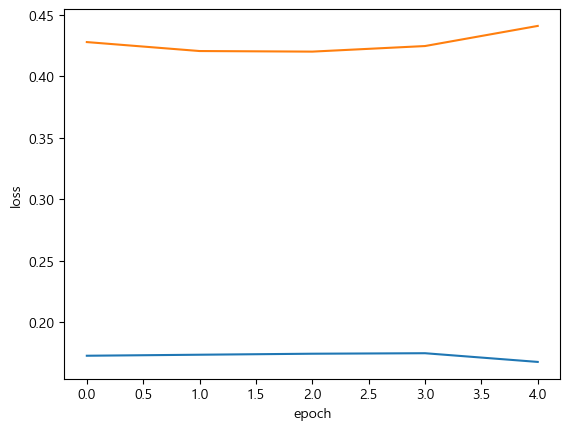

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [48]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.8940 - loss: 0.4219


[0.4201560914516449, 0.8926666378974915]